In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('train.csv')
data=pd.get_dummies(data)

In [10]:
data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,...,0,0,0,0,0,0,0,0,0,0
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,...,0,0,0,0,0,0,0,0,0,0
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,...,0,0,0,0,0,0,0,0,0,0
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,...,0,0,0,0,0,0,0,0,0,0
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.drop(['id'], axis=1)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,...,0,0,0,0,0,0,0,0,0,0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,...,0,0,0,0,0,0,0,0,0,0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,...,0,0,0,0,0,0,0,0,0,0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,...,0,0,0,0,0,0,0,0,0,0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,...,0,0,0,0,0,0,0,0,0,0
188314,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,...,0,0,0,0,0,0,0,0,0,0
188315,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,...,0,0,0,0,0,0,0,0,0,0
188316,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import umap.umap_ as umap

um = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=100)


um_result = um.fit_transform(data)
um_result.shape

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 13 separate connected components using meta-embedding (experimental)
  n_components


(188318, 100)

In [28]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=20, kernel='rbf', gamma=20)
kpca = kpca.fit(um_result)
kpca_result = kpca.transform(um_result)
kpca_result.shape

MemoryError: Unable to allocate 132. GiB for an array with shape (188318, 188318) and data type float32

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(kpca_result)
pca_result = pca.transform(kpca_result)
pca_result.shape

NameError: name 'pca_result' is not defined

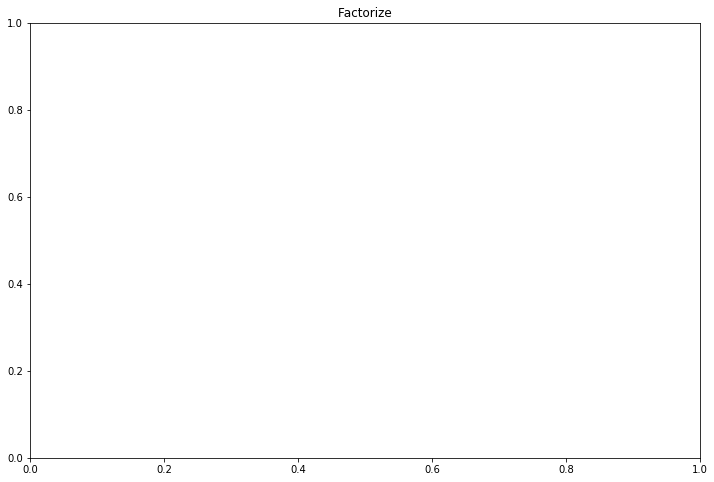

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title('Factorize')
plt.scatter(pca_result[:, 0], pca_result[:, 1])